# Pandas Test

** In this test, we are looking for you to examine and describe a dataset.  With the loaded Dataset you will do some manipulation on the columns with your knowledge of lists and dictionaries.**

** If you are not sure then always try and look up the answer where possible.  There are some links in the notebook.**

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.

The First three questions, please answer by writing and explaining the answer.  Use Python code from step 2.

##### 1. What does the data describe?

The data describes:

* State: a label for a sub-set of US states, in the form of a unique two letter string (including one record 'all' - see below)
* Rate: the rate of participation of students in the SAT for each state, as an integer (including one record that gives the mean of the whole column)
* Verbal: the mean verbal score on the SAT in the state in question, as an integer ranging from 482 to 593 (including one record that gives the mean of the whole column)
* Math: the mean math score on the SAT in the state in question, as an integer ranging from 439 to 603 (including one record that gives the mean of the whole column)

Given the changes to the SAT scoring system in recent years, it is difficult to determine which year the data belongs to, but it seems likely that the Math and Verbal columns are scored out of 800.

In [157]:
datafile.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


##### 2. Does the data look complete? Are there any obvious issues with the observations?

In [158]:
nans = lambda datafile: datafile[datafile.isnull().any(axis=1)]
nans(datafile)

,State,Rate,Verbal,Math


There does not appear to be any null or Nan data in the dataset.  

51 records are included in the data.  This conforms to 50 states in the federal republic of the United States, plus the federal district of Washington D.C. It excludes Puerto Rico, which accounts for the remaining 1 out of 52 states.  

It is not clear how the rate of acceptance is calculated.  A reasonable hypothesis would be that it is the percentage of student population that participate in the SAT in each state.  However, we do not know the denominator in this case, so it is difficult to make a firm assignment as to what the rate refers to without further investigation.

##### 3. Create a data dictionary for the dataset.

Look up examples of this and try and make a simple table in Markdown

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#links)

| Foo           | Bar           | Baz   |Qux    |
| ------------- |:-------------:|:-----:|-------:
| nag nag nag   | Blah blah     | 10203 |Some   |
| another row   | rhubarb       | natter|thing  |
| another row   | are neat      | mutter|else   |


## Step 2: Load the data.

##### 4. Load the data into a Pandas Dataframe

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file = pd.read_csv('sat_scores.csv', header='infer')
datafile = file

##### 5. Print the first six and last six rows of the Dataframe

In [137]:
datafile.head(6)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499


In [138]:
datafile.tail(6)

,State,Rate,Verbal,Math
46,UT,5,575,570
47,IA,5,593,603
48,SD,4,577,582
49,ND,4,592,599
50,MS,4,566,551
51,All,45,506,514


##### 6. Show the Column labels from the data.

In [139]:
datafile.columns.values

array(['State', 'Rate', 'Verbal', 'Math'], dtype=object)

##### 7. Create a list of State names extracted from the data. Then Assign the state labels as the index

Apologies - I couldn't work out how to do this.  When I assigned the States as a column name via pandas.dataframe.reindex, each of the rate, math and verbal columns filled with nans that were of type float and seemingly immutable. I did check for Nans before completing that transformation (I left Question 7 for last) so I'm not sure what went wrong. Grateful for a couple of mins to run through where things went awry if possible please.  Leaving my code in situ threw out a load of other work on this notebook so had to remove it so that the standard deviation function would work etc.

##### 8. Print the types of each column

In [140]:
df1 = datafile
df1.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### 9. Do any types need to be reassigned? If so, go ahead and do it or demonstrate how you would.

In [141]:
datafile["Rate"].astype(int) #know it's not necessary but just demonstrating how to go about this

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [142]:
datafile["Verbal"].astype(int)

0     509
1     499
2     511
3     495
4     520
5     501
6     500
7     511
8     506
9     510
10    501
11    508
12    493
13    491
14    499
15    486
16    482
17    526
18    498
19    527
20    493
21    485
22    514
23    498
24    523
25    509
26    539
27    534
28    539
29    527
30    543
31    562
32    551
33    576
34    550
35    547
36    561
37    580
38    577
39    559
40    562
41    567
42    577
43    564
44    584
45    562
46    575
47    593
48    577
49    592
50    566
51    506
Name: Verbal, dtype: int64

In [143]:
datafile["Math"].astype(int)

0     510
1     513
2     515
3     505
4     516
5     499
6     499
7     506
8     500
9     501
10    499
11    510
12    499
13    489
14    501
15    488
16    474
17    526
18    499
19    527
20    499
21    515
22    510
23    517
24    525
25    515
26    542
27    439
28    539
29    512
30    542
31    553
32    542
33    589
34    550
35    545
36    572
37    589
38    580
39    554
40    568
41    561
42    577
43    562
44    596
45    550
46    570
47    603
48    582
49    599
50    551
51    514
Name: Math, dtype: int64

In [144]:
datafile.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [145]:
state = datafile['State']
rate = datafile['Rate']
verbal = datafile['Verbal']
math = datafile['Math']

In [146]:
pd.Series(rate.values,index=state).to_dict()

{'AK': 51,
 'AL': 9,
 'AR': 6,
 'AZ': 34,
 'All': 45,
 'CA': 51,
 'CO': 31,
 'CT': 82,
 'DC': 56,
 'DE': 67,
 'FL': 54,
 'GA': 63,
 'HI': 52,
 'IA': 5,
 'ID': 17,
 'IL': 12,
 'IN': 60,
 'KS': 9,
 'KY': 12,
 'LA': 7,
 'MA': 79,
 'MD': 65,
 'ME': 69,
 'MI': 11,
 'MN': 9,
 'MO': 8,
 'MS': 4,
 'MT': 23,
 'NC': 65,
 'ND': 4,
 'NE': 8,
 'NH': 72,
 'NJ': 81,
 'NM': 13,
 'NV': 33,
 'NY': 77,
 'OH': 26,
 'OK': 8,
 'OR': 55,
 'PA': 71,
 'RI': 71,
 'SC': 57,
 'SD': 4,
 'TN': 13,
 'TX': 53,
 'UT': 5,
 'VA': 68,
 'VT': 69,
 'WA': 53,
 'WI': 6,
 'WV': 18,
 'WY': 11}

In [147]:
pd.Series(math.values,index=state).to_dict()

{'AK': 510,
 'AL': 554,
 'AR': 550,
 'AZ': 525,
 'All': 514,
 'CA': 517,
 'CO': 542,
 'CT': 510,
 'DC': 474,
 'DE': 499,
 'FL': 499,
 'GA': 489,
 'HI': 515,
 'IA': 603,
 'ID': 542,
 'IL': 589,
 'IN': 501,
 'KS': 580,
 'KY': 550,
 'LA': 562,
 'MA': 515,
 'MD': 510,
 'ME': 500,
 'MI': 572,
 'MN': 589,
 'MO': 577,
 'MS': 551,
 'MT': 539,
 'NC': 499,
 'ND': 599,
 'NE': 568,
 'NH': 516,
 'NJ': 513,
 'NM': 542,
 'NV': 515,
 'NY': 505,
 'OH': 439,
 'OK': 561,
 'OR': 526,
 'PA': 499,
 'RI': 499,
 'SC': 488,
 'SD': 582,
 'TN': 553,
 'TX': 499,
 'UT': 570,
 'VA': 501,
 'VT': 506,
 'WA': 527,
 'WI': 596,
 'WV': 512,
 'WY': 545}

In [148]:
pd.Series(verbal.values,index=state).to_dict()

{'AK': 514,
 'AL': 559,
 'AR': 562,
 'AZ': 523,
 'All': 506,
 'CA': 498,
 'CO': 539,
 'CT': 509,
 'DC': 482,
 'DE': 501,
 'FL': 498,
 'GA': 491,
 'HI': 485,
 'IA': 593,
 'ID': 543,
 'IL': 576,
 'IN': 499,
 'KS': 577,
 'KY': 550,
 'LA': 564,
 'MA': 511,
 'MD': 508,
 'ME': 506,
 'MI': 561,
 'MN': 580,
 'MO': 577,
 'MS': 566,
 'MT': 539,
 'NC': 493,
 'ND': 592,
 'NE': 562,
 'NH': 520,
 'NJ': 499,
 'NM': 551,
 'NV': 509,
 'NY': 495,
 'OH': 534,
 'OK': 567,
 'OR': 526,
 'PA': 500,
 'RI': 501,
 'SC': 486,
 'SD': 577,
 'TN': 562,
 'TX': 493,
 'UT': 575,
 'VA': 510,
 'VT': 511,
 'WA': 527,
 'WI': 584,
 'WV': 527,
 'WY': 547}

##### 11. Create a dictionary with the values for each of the numeric columns

In [149]:
new_dict = {"Rate": list(datafile["Rate"]), "Verbal": list(datafile["Verbal"]),"Math": list(datafile["Math"])}
new_dict

{'Math': [510,
  513,
  515,
  505,
  516,
  499,
  499,
  506,
  500,
  501,
  499,
  510,
  499,
  489,
  501,
  488,
  474,
  526,
  499,
  527,
  499,
  515,
  510,
  517,
  525,
  515,
  542,
  439,
  539,
  512,
  542,
  553,
  542,
  589,
  550,
  545,
  572,
  589,
  580,
  554,
  568,
  561,
  577,
  562,
  596,
  550,
  570,
  603,
  582,
  599,
  551,
  514],
 'Rate': [82,
  81,
  79,
  77,
  72,
  71,
  71,
  69,
  69,
  68,
  67,
  65,
  65,
  63,
  60,
  57,
  56,
  55,
  54,
  53,
  53,
  52,
  51,
  51,
  34,
  33,
  31,
  26,
  23,
  18,
  17,
  13,
  13,
  12,
  12,
  11,
  11,
  9,
  9,
  9,
  8,
  8,
  8,
  7,
  6,
  6,
  5,
  5,
  4,
  4,
  4,
  45],
 'Verbal': [509,
  499,
  511,
  495,
  520,
  501,
  500,
  511,
  506,
  510,
  501,
  508,
  493,
  491,
  499,
  486,
  482,
  526,
  498,
  527,
  493,
  485,
  514,
  498,
  523,
  509,
  539,
  534,
  539,
  527,
  543,
  562,
  551,
  576,
  550,
  547,
  561,
  580,
  577,
  559,
  562,
  567,
  577,
  564,
  

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [150]:
datafile.min()

State      AK
Rate        4
Verbal    482
Math      439
dtype: object

In [151]:
datafile.max()

State      WY
Rate       82
Verbal    593
Math      603
dtype: object

##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

To calculate the standard deviation:

1. Take the difference between each value in a column and the mean of that column.
2. Square each difference value
3. Find the Total of these differences (i.e. The SUM of all the differences)
4. Divide by the number of values present to find the mean of these differences.  This gives the **Variance**
5. Standard Deviation is the square root of the Variance

In [152]:
from math import sqrt

def calculate_sigma(column):
    n = len(column) 
    mean_value = sum(column) / float(len(column))
    variance = sum([(i - mean_value)**2 for i in column]) / n
    sigma = sqrt(variance)
    return(sigma)

In [153]:
rate = datafile['Rate']
math = datafile['Math']
verbal = datafile['Verbal']

In [154]:
print "The standard deviation of the verbal data is:"
calculate_sigma(verbal)

The standard deviation of the verbal data is:


32.915094961603266

In [155]:
print "The standard deviation of the math data is:"
calculate_sigma(math)

The standard deviation of the math data is:


35.66699616430595

In [2]:
print "The standard deviation of the rate data is:"
calculate_sigma(rate)

The standard deviation of the rate data is:


NameError: name 'calculate_sigma' is not defined

# Bonus
## Step 4: Make a graph for each column using pandas or matplotlib

See if you can work out by looking up documentation

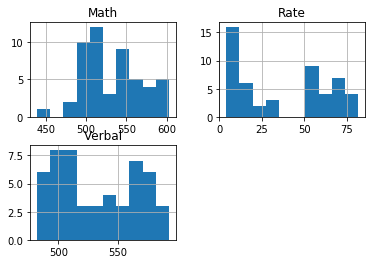

In [22]:
datafile.hist()
plt.show()

##### Are there any interesting relationships to note?

There appears to be a gap in the rate between two clusters of states, with rates of participation below 30-35 per cent and above 50 per cent.  It would be interesting to explore the geographic distribution of this difference, perhaps via  a chloropeth or heatmap.

There is some negative skew, in the distribution of math and verbal scores.  Math seems to tail off more quickly, whereas verbal reasoning scores are (compared to math) more evenly distibuted, but with some pronounced peaks toward the top and bottom end.